#### Загрузим данные и посмотрим на них

In [1]:
import warnings
import matplotlib.pyplot as plt

from pandas import DataFrame

warnings.filterwarnings("ignore")

!pip install pandas -q

import pandas as pd
# Хак чтобы работало на Anaconda под MacOs 10.15.7 Catalina
pd.DataFrame.iteritems = pd.DataFrame.items

In [2]:
!pip install plotly -q

import plotly.graph_objects as go

def linear_plot(df, title):
    fig = go.Figure([go.Scatter(x=df['date'], y=df['close'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.show()

def candlestick_plot(df, title):
    fig = go.Figure([go.Candlestick(x=df['date'],
                                open=df['open'],
                                high=df['high'],
                                low=df['low'],
                                close=df['close'])])
    fig.update_layout(xaxis_rangeslider_visible=False,
                      plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.update_yaxes(fixedrange=False)
    fig.show()

In [106]:
!pip install ccxt -q

import ccxt
import time

def get_data(symbol, timeframe, since):
    exchange = ccxt.binance()
    since = exchange.parse8601(since)
    all_ohlcvs = []
    
    while True:
        try:
            ohlcvs = exchange.fetch_ohlcv(symbol, timeframe, since)
            all_ohlcvs += ohlcvs
            if len(ohlcvs):
                print('Fetched', len(ohlcvs), symbol, timeframe, 'candles from', exchange.iso8601(ohlcvs[0][0]))
                since = ohlcvs[-1][0] + 1
                sleep_interval = exchange.rateLimit / 1000
                print('Sleep for', sleep_interval)
                time.sleep(sleep_interval)
            else:
                break
        except Exception as e:
            print(type(e).__name__, str(e))
    print('Fetched', len(all_ohlcvs), symbol, timeframe, 'candles in total')
    
    df = pd.DataFrame(all_ohlcvs)
    df.columns = ['date','open','high','low','close','volume']
    df = df.sort_values(by='date')
    df = df.drop_duplicates(subset='date').reset_index(drop=True)
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    df.to_csv(symbol.replace('/', '_') + '_' + timeframe + '.csv', index=False)
    return df

In [352]:
df = get_data('ETH/USDT', '1d', '2020-01-01T00:00:00Z')
df

Fetched 500 ETH/USDT 1d candles from 2020-01-01T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1d candles from 2021-05-15T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1d candles from 2022-09-27T00:00:00.000Z
Sleep for 0.05
Fetched 336 ETH/USDT 1d candles from 2024-02-09T00:00:00.000Z
Sleep for 0.05
Fetched 1836 ETH/USDT 1d candles in total


date     open     high      low    close        volume
0    2020-01-01   129.16   133.05   128.68   130.77  144770.52197
1    2020-01-02   130.72   130.78   126.38   127.19  213757.05806
2    2020-01-03   127.19   135.14   125.88   134.35  413055.18895
3    2020-01-04   134.37   135.85   132.50   134.20  184276.17102
4    2020-01-05   134.20   138.19   134.19   135.37  254120.45343
...         ...      ...      ...      ...      ...           ...
1831 2025-01-05  3656.88  3675.25  3593.70  3635.99  155444.17410
1832 2025-01-06  3636.00  3744.83  3610.63  3687.45  329642.36480
1833 2025-01-07  3687.44  3700.86  3356.31  3381.31  541543.28740
1834 2025-01-08  3381.31  3415.10  3208.20  3327.29  584749.96270
1835 2025-01-09  3327.29  3357.27  3210.28  3244.70  369409.27460

[1836 rows x 6 columns]

In [339]:
linear_plot(df, 'ETH/USDT')

In [358]:
df = pd.read_csv('ETH_USDT_1d.csv')
df = df.sort_values(by='date')
df = df.drop_duplicates(subset='date').reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

open     high      low    close        volume
date                                                        
2020-01-01   129.16   133.05   128.68   130.77  144770.52197
2020-01-02   130.72   130.78   126.38   127.19  213757.05806
2020-01-03   127.19   135.14   125.88   134.35  413055.18895
2020-01-04   134.37   135.85   132.50   134.20  184276.17102
2020-01-05   134.20   138.19   134.19   135.37  254120.45343
...             ...      ...      ...      ...           ...
2025-01-05  3656.88  3675.25  3593.70  3635.99  155444.17410
2025-01-06  3636.00  3744.83  3610.63  3687.45  329642.36480
2025-01-07  3687.44  3700.86  3356.31  3381.31  541543.28740
2025-01-08  3381.31  3415.10  3208.20  3327.29  584749.96270
2025-01-09  3327.29  3357.27  3210.28  3244.70  369409.27460

[1836 rows x 5 columns]

In [4]:
df.shape

(8986, 5)

In [5]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [33]:
df.describe()

open         high          low        close         volume
count  8986.000000  8986.000000  8986.000000  8986.000000    8986.000000
mean   3054.541471  3068.276729  3039.666715  3054.655811   16839.867382
std     509.302984   511.884083   506.345479   509.245256   17840.921145
min    2169.960000  2194.920000  2100.000000  2169.960000      62.606200
25%    2570.020000  2582.060000  2557.237500  2570.087500    7114.248350
50%    3102.890000  3116.555000  3086.310000  3102.960000   11713.143200
75%    3472.197500  3488.962500  3454.985000  3472.207500   20017.034100
max    4086.660000  4107.800000  4062.600000  4086.660000  463263.532900

In [359]:
# Удалим значения где нет объемов
df = df.drop(df[df['volume']==0.0].index)

In [343]:
def create_trend_features(df, features, lag_periods):
    """
    Добавляет классические финансовые признаки: отношение к предыдущим периодам, логарифмические изменения и индикаторы трендов.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить индикаторы
    lag_periods: сколько периодов назад учитывать для расчетов
    
    Возвращает:
    - обновленный DataFrame с новыми фичами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    for feature in features:
        # Отношение текущего значения к предыдущему (лаг = 1)
        df[f'{feature}_ratio_1'] = df[feature] / df[feature].shift(1)
        new_columns.append(f'{feature}_ratio_1')
        
        # Логарифмическое изменение (логарифм отношения текущего значения к предыдущему)
        df[f'{feature}_log_diff_1'] = np.log(df[feature] / df[feature].shift(1))
        new_columns.append(f'{feature}_log_diff_1')
        
        # Momentum (разница между текущим значением и значением N периодов назад)
        df[f'{feature}_momentum_{lag_periods}'] = df[feature] - df[feature].shift(lag_periods)
        new_columns.append(f'{feature}_momentum_{lag_periods}')
        
        # Rate of Change (ROC): процентное изменение за N периодов
        df[f'{feature}_roc_{lag_periods}'] = (df[feature] - df[feature].shift(lag_periods)) / df[feature].shift(lag_periods) * 100
        new_columns.append(f'{feature}_roc_{lag_periods}')
        
        # Exponential Moving Average (EMA) с периодом N
        df[f'{feature}_ema_{lag_periods}'] = df[feature].ewm(span=lag_periods, adjust=False).mean()
        new_columns.append(f'{feature}_ema_{lag_periods}')
    
    # Удаление строк с NaN значениями, которые появились из-за сдвигов
    df = df.dropna()
    
    return df, new_columns

In [344]:
def create_macd(df, feature, short_window=12, long_window=26):
    """
    Добавляет индикатор MACD (разница между краткосрочным и долгосрочным EMA).
    
    df: DataFrame с исходными данными
    feature: признак, для которого необходимо рассчитать MACD
    short_window: окно для краткосрочного EMA (по умолчанию 12)
    long_window: окно для долгосрочного EMA (по умолчанию 26)
    
    Возвращает:
    - обновленный DataFrame с MACD
    - название новой колонки с MACD
    """
    df = df.copy()
    
    # Рассчитываем краткосрочное и долгосрочное EMA
    ema_short = df[feature].ewm(span=short_window, adjust=False).mean()
    ema_long = df[feature].ewm(span=long_window, adjust=False).mean()
    
    # Разница между краткосрочным и долгосрочным EMA (MACD)
    df[f'{feature}_macd'] = ema_short - ema_long
    
    return df, f'{feature}_macd'

In [360]:
# Параметры для создания трендовых признаков
lag_periods = 3  # Например, 3 периода назад
features_to_trend = ['open', 'high', 'low', 'close', 'volume']

# Создаем трендовые признаки
data_with_trend, new_trend_features = create_trend_features(df, features_to_trend, lag_periods)

# Добавляем MACD для признака 'close'
data_with_trend, macd_column = create_macd(data_with_trend, 'close')

# Добавляем название колонки с MACD в список новых фичей
new_trend_features.append(macd_column)

In [361]:
df = data_with_trend[new_trend_features + features_to_trend]
df

open_ratio_1  open_log_diff_1  open_momentum_3  open_roc_3  \
date                                                                     
2020-01-04      1.056451         0.054915             5.21    4.033757   
2020-01-05      0.998735        -0.001266             3.48    2.662179   
2020-01-06      1.008718         0.008681             8.18    6.431323   
2020-01-07      1.064785         0.062773             9.77    7.270968   
2020-01-08      0.990703        -0.009340             8.60    6.408346   
...                  ...              ...              ...         ...   
2025-01-05      1.013267         0.013180           296.49    8.823083   
2025-01-06      0.994290        -0.005726           180.32    5.218076   
2025-01-07      1.014147         0.014048            78.44    2.173455   
2025-01-08      0.916980        -0.086669          -275.57   -7.535659   
2025-01-09      0.984024        -0.016105          -308.71   -8.490374   

             open_ema_3  high_ratio_1  high_log_diff_1  high_momentum_3  \
date                                                                      
2020-01-04   131.467500      1.005254         0.005240             2.80   
2020-01-05   132.833750      1.017225         0.017078             7.41   
2020-01-06   134.101875      1.045010         0.044027             9.27   
2020-01-07   139.120937      1.006232         0.006213             9.46   
2020-01-08   140.960469      1.016929         0.016788             9.58   
...                 ...           ...              ...              ...   
2025-01-05  3582.183827      1.000994         0.000994           165.26   
2025-01-06  3609.091914      1.018932         0.018755           114.83   
2025-01-07  3648.265957      0.988258        -0.011811            29.26   
2025-01-08  3514.787978      0.922786        -0.080358          -260.15   
2025-01-09  3421.038989      0.983066        -0.017079          -387.56   

            high_roc_3   high_ema_3  ...  volume_log_diff_1  \
date                                 ...                      
2020-01-04    2.104472   134.688750  ...          -0.807146   
2020-01-05    5.666004   136.439375  ...           0.321373   
2020-01-06    6.859553   140.424688  ...           0.473508   
2020-01-07    6.963563   142.867344  ...           0.092945   
2020-01-08    6.932484   145.318672  ...           0.242191   
...                ...          ...  ...                ...   
2025-01-05    4.708276  3641.726944  ...          -0.388598   
2025-01-06    3.163361  3693.278472  ...           0.751722   
2025-01-07    0.796928  3697.069236  ...           0.496415   
2025-01-08   -7.078430  3556.084618  ...           0.076761   
2025-01-09  -10.349201  3456.677309  ...          -0.459279   

            volume_momentum_3  volume_roc_3   volume_ema_3  close_macd  \
date                                                                     
2020-01-04        39505.64905     27.288462  240217.830251    0.000000   
2020-01-05        40363.39537     18.882836  247169.141841    0.093333   
2020-01-06        -5034.91520     -1.218945  327594.707795    0.865793   
2020-01-07       263486.00179    142.984305  387678.440303    1.353437   
2020-01-08       316345.12421    124.486290  479072.008971    1.554145   
...                       ...           ...            ...         ...   
2025-01-05      -183188.71330    -54.096551  213522.855396   -7.451437   
2025-01-06        -4398.69560     -1.316813  271582.610098    7.540952   
2025-01-07       312276.97410    136.207090  406562.948749   -5.220235   
2025-01-08       429305.78860    276.180044  495656.455724  -19.468115   
2025-01-09        39766.90980     12.063653  432532.865162  -36.997500   

               open     high      low    close        volume  
date                                                          
2020-01-04   134.37   135.85   132.50   134.20  184276.17102  
2020-01-05   134.20   138.19   134.19   135.37  254120.45343  
2020-01-06   135.37   144.41   134.86 

#### Подключим библиотеки PyTorch

In [6]:
!pip install torch -q

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#### Разобьем данные на обучающую и тестовую выборки

In [362]:
data = df.copy()
window_size = 30
data

open_ratio_1  open_log_diff_1  open_momentum_3  open_roc_3  \
date                                                                     
2020-01-04      1.056451         0.054915             5.21    4.033757   
2020-01-05      0.998735        -0.001266             3.48    2.662179   
2020-01-06      1.008718         0.008681             8.18    6.431323   
2020-01-07      1.064785         0.062773             9.77    7.270968   
2020-01-08      0.990703        -0.009340             8.60    6.408346   
...                  ...              ...              ...         ...   
2025-01-05      1.013267         0.013180           296.49    8.823083   
2025-01-06      0.994290        -0.005726           180.32    5.218076   
2025-01-07      1.014147         0.014048            78.44    2.173455   
2025-01-08      0.916980        -0.086669          -275.57   -7.535659   
2025-01-09      0.984024        -0.016105          -308.71   -8.490374   

             open_ema_3  high_ratio_1  high_log_diff_1  high_momentum_3  \
date                                                                      
2020-01-04   131.467500      1.005254         0.005240             2.80   
2020-01-05   132.833750      1.017225         0.017078             7.41   
2020-01-06   134.101875      1.045010         0.044027             9.27   
2020-01-07   139.120937      1.006232         0.006213             9.46   
2020-01-08   140.960469      1.016929         0.016788             9.58   
...                 ...           ...              ...              ...   
2025-01-05  3582.183827      1.000994         0.000994           165.26   
2025-01-06  3609.091914      1.018932         0.018755           114.83   
2025-01-07  3648.265957      0.988258        -0.011811            29.26   
2025-01-08  3514.787978      0.922786        -0.080358          -260.15   
2025-01-09  3421.038989      0.983066        -0.017079          -387.56   

            high_roc_3   high_ema_3  ...  volume_log_diff_1  \
date                                 ...                      
2020-01-04    2.104472   134.688750  ...          -0.807146   
2020-01-05    5.666004   136.439375  ...           0.321373   
2020-01-06    6.859553   140.424688  ...           0.473508   
2020-01-07    6.963563   142.867344  ...           0.092945   
2020-01-08    6.932484   145.318672  ...           0.242191   
...                ...          ...  ...                ...   
2025-01-05    4.708276  3641.726944  ...          -0.388598   
2025-01-06    3.163361  3693.278472  ...           0.751722   
2025-01-07    0.796928  3697.069236  ...           0.496415   
2025-01-08   -7.078430  3556.084618  ...           0.076761   
2025-01-09  -10.349201  3456.677309  ...          -0.459279   

            volume_momentum_3  volume_roc_3   volume_ema_3  close_macd  \
date                                                                     
2020-01-04        39505.64905     27.288462  240217.830251    0.000000   
2020-01-05        40363.39537     18.882836  247169.141841    0.093333   
2020-01-06        -5034.91520     -1.218945  327594.707795    0.865793   
2020-01-07       263486.00179    142.984305  387678.440303    1.353437   
2020-01-08       316345.12421    124.486290  479072.008971    1.554145   
...                       ...           ...            ...         ...   
2025-01-05      -183188.71330    -54.096551  213522.855396   -7.451437   
2025-01-06        -4398.69560     -1.316813  271582.610098    7.540952   
2025-01-07       312276.97410    136.207090  406562.948749   -5.220235   
2025-01-08       429305.78860    276.180044  495656.455724  -19.468115   
2025-01-09        39766.90980     12.063653  432532.865162  -36.997500   

               open     high      low    close        volume  
date                                                          
2020-01-04   134.37   135.85   132.50   134.20  184276.17102  
2020-01-05   134.20   138.19   134.19   135.37  254120.45343  
2020-01-06   135.37   144.41   134.86 

In [363]:
def get_data_loader(data):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)

        if data['close'].iloc[i + window_size] > data['close'].iloc[i + window_size - 1]:
            y.append(2)  # Buy
        elif data['close'].iloc[i + window_size] < data['close'].iloc[i + window_size - 1]:
            y.append(0)  # Sell
        else:
            y.append(1)  # Hold

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=32, shuffle=False)

In [364]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=3)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 1740, Test size: 93


Напишем метод обучения модели и расчета метрик качества

In [365]:
!pip install torchmetrics -q

from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def train_model(model, dataloader, num_epochs=10, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)
    
    accuracy = MulticlassAccuracy(num_classes=3, average="weighted")
    precision = MulticlassPrecision(num_classes=3, average="weighted")
    recall = MulticlassRecall(num_classes=3, average="weighted")
    f1_score = MulticlassF1Score(num_classes=3, average="weighted")

    all_metrics = []

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            
            accuracy.update(outputs, labels)
            precision.update(outputs, labels)
            recall.update(outputs, labels)
            f1_score.update(outputs, labels)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        metrics = {
            'Loss': loss.item(),
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print("Metrics")
        print(metrics)
        all_metrics.append(metrics)
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
        
    metrics_df = pd.DataFrame(all_metrics)
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Loss'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Loss',
                      title="Loss/Epoch")
    fig.show()
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Accuracy'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Accuracy',
                      title="Accuracy/Epoch")
    fig.show()

#### CNN модель

In [310]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(31, 16, kernel_size=3)  # Input: 31 channels, Output: 16 channels
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
        self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
        self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
        x = torch.relu(self.fc1(x))
        return self.fc2(x)  # Return logits (raw output) for each class

Обучим модель

In [311]:
cnn = CNN()
train_model(cnn, loader_train, num_epochs=50, lr=0.00005)

Epoch [1/50]
Metrics
{'Loss': 2.5916152000427246, 'Precision': 0.50896817445755, 'Recall': 0.5069588422775269, 'Accuracy': 0.5069588422775269, 'F1-Score': 0.5079283714294434}
Epoch [2/50]
Metrics
{'Loss': 5.5310050811385736e-05, 'Precision': 0.5077539682388306, 'Recall': 0.5075510740280151, 'Accuracy': 0.5075510740280151, 'F1-Score': 0.5076466202735901}
Epoch [3/50]
Metrics
{'Loss': 0.00029920070664957166, 'Precision': 0.5229724645614624, 'Recall': 0.5230974555015564, 'Accuracy': 0.5230974555015564, 'F1-Score': 0.5230326652526855}
Epoch [4/50]
Metrics
{'Loss': 0.002167370170354843, 'Precision': 0.5276110768318176, 'Recall': 0.5276873111724854, 'Accuracy': 0.5276873111724854, 'F1-Score': 0.5276341438293457}
Epoch [5/50]
Metrics
{'Loss': 0.0007140212110243738, 'Precision': 0.5303915739059448, 'Recall': 0.5305004119873047, 'Accuracy': 0.5305004119873047, 'F1-Score': 0.5304398536682129}
Epoch [6/50]
Metrics
{'Loss': 0.003776500467211008, 'Precision': 0.5312128663063049, 'Recall': 0.5312407

Посмотрим на предсказания на тестовых данных

In [312]:
!pip install torchmetrics -q

from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def predict(model, loader):
    model.eval()
    
    all_predictions = []
    all_targets = []

    accuracy = MulticlassAccuracy(num_classes=3, average="weighted")
    precision = MulticlassPrecision(num_classes=3, average="weighted")
    recall = MulticlassRecall(num_classes=3, average="weighted")
    f1_score = MulticlassF1Score(num_classes=3, average="weighted")
    
    with torch.no_grad():
        for inputs, targets in loader:
            # print("Inputs")
            # print(f"Inputs shape: {inputs.shape}")
            # print(f"Inputs data: {inputs}")
            # print(f"Targets shape: {targets.shape}")
            # print(f"Targets data: {targets.data}")
            outputs = model(inputs)
            
            accuracy.update(outputs, targets)
            precision.update(outputs, targets)
            recall.update(outputs, targets)
            f1_score.update(outputs, targets)
            
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.numpy())
            all_targets.extend(targets.numpy())
        
        metrics = {
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print(f"Metrics {metrics}")
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
    return all_predictions, all_targets

In [313]:
# Plot actual vs predicted labels
def plot(all_predictions, all_targets, title):
    plt.figure(figsize=(12, 6))
    plt.plot(all_targets[-90:], label='Actual', color='blue', linestyle='--', alpha=0.3)
    plt.plot(all_predictions[-90:], label='Predicted', color='red', alpha=0.7)
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Signal (0=Sell, 1=Hold, 2=Buy)")
    plt.legend()
    plt.show()

Metrics {'Precision': 0.49417877197265625, 'Recall': 0.4924277067184448, 'Accuracy': 0.4924277067184448, 'F1-Score': 0.48315566778182983}


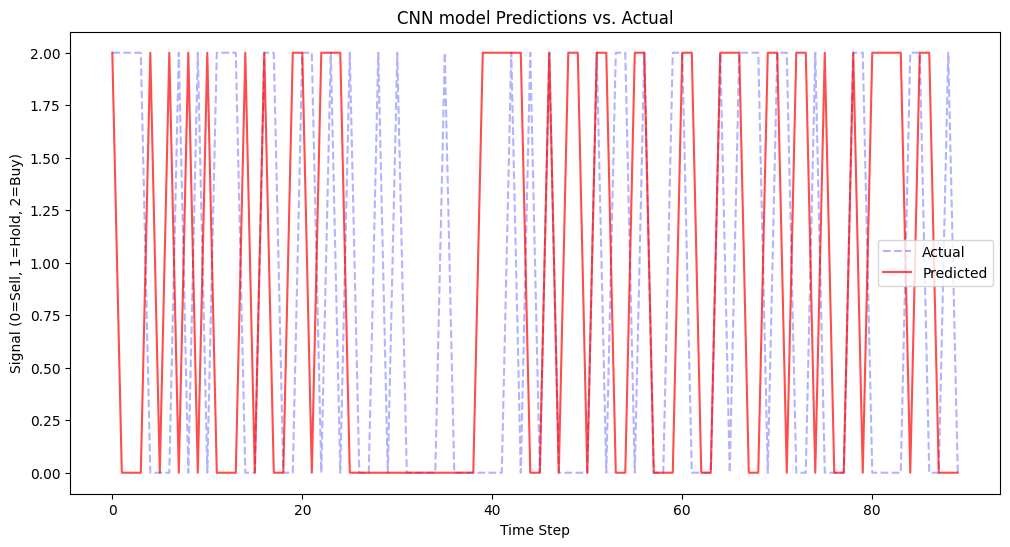

In [314]:
all_predictions, all_targets = predict(cnn, loader_test)
plot(all_predictions, all_targets, "CNN model Predictions vs. Actual")

In [315]:
test_data

open_ratio_1  open_log_diff_1  open_momentum_3  \
date                                                                  
2024-10-09 19:00:00      0.992182        -0.007848           -46.09   
2024-10-09 20:00:00      1.001279         0.001279           -15.84   
2024-10-09 21:00:00      0.974313        -0.026023           -78.06   
2024-10-09 22:00:00      1.009443         0.009399           -36.78   
2024-10-09 23:00:00      0.997906        -0.002096           -44.85   
...                           ...              ...              ...   
2025-01-09 15:00:00      1.009394         0.009351           -50.11   
2025-01-09 16:00:00      1.021305         0.021082            24.36   
2025-01-09 17:00:00      0.994633        -0.005381            81.71   
2025-01-09 18:00:00      0.984168        -0.015959            -0.84   
2025-01-09 19:00:00      1.002987         0.002983           -60.40   

                     open_roc_3   open_ema_3  high_ratio_1  high_log_diff_1  \
date                                                                          
2024-10-09 19:00:00   -1.872588  2426.450847      0.993608        -0.006413   
2024-10-09 20:00:00   -0.650743  2422.375423      0.998567        -0.001434   
2024-10-09 21:00:00   -3.206750  2389.277712      0.984373        -0.015750   
2024-10-09 22:00:00   -1.522849  2383.853856      1.000374         0.000374   
2024-10-09 23:00:00   -1.854609  2378.651928      0.997934        -0.002068   
...                         ...          ...           ...              ...   
2025-01-09 15:00:00   -1.517836  3256.297592      1.025759         0.025433   
2025-01-09 16:00:00    0.739031  3288.433796      0.997276        -0.002728   
2025-01-09 17:00:00    2.536758  3295.591898      0.992936        -0.007090   
2025-01-09 18:00:00   -0.025836  3273.025949      0.989696        -0.010358   
2025-01-09 19:00:00   -1.818965  3266.597975      0.996958        -0.003047   

                     high_momentum_3  high_roc_3   high_ema_3  ...  \
date                                                           ...   
2024-10-09 19:00:00           -40.84   -1.658403  2432.753592  ...   
2024-10-09 20:00:00           -22.12   -0.906401  2425.526796  ...   
2024-10-09 21:00:00           -56.84   -2.332041  2403.018398  ...   
2024-10-09 22:00:00           -40.37   -1.666963  2392.209199  ...   
2024-10-09 23:00:00           -41.82   -1.729314  2384.344600  ...   
...                              ...         ...          ...  ...   
2025-01-09 15:00:00            26.69    0.806269  3308.946392  ...   
2025-01-09 16:00:00            28.92    0.876632  3318.428196  ...   
2025-01-09 17:00:00            51.20    1.573835  3311.414098  ...   
2025-01-09 18:00:00           -66.65   -1.997303  3290.882049  ...   
2025-01-09 19:00:00           -67.51   -2.028601  3275.641024  ...   

                     volume_log_diff_1  volume_momentum_3  volume_roc_3  \
date                                                                      
2024-10-09 19:00:00          -0.913951         -5714.3583    -46.845413   
2024-10-09 20:00:00           1.689700         29220.4623    494.526553   
2024-10-09 21:00:00          -0.963392         -2766.8616    -17.108905   
2024-10-09 22:00:00          -0.266266          3787.5641     58.414257   
2024-10-09 23:00:00          -0.413874        -28338.8877    -80.670375   
...                                ...                ...           ...   
2025-01-09 15:00:00          -0.248166         22334.8010    218.741813   
2025-01-09 16:00:00          -0.288435        -20636.7669    -45.831550   
2025-01-09 17:00:00           0.040158        -16322.4583    -39.130836   
2025-01-09 18:00:00          -0.554216        -17958.2198    -55.179018   
2025-01-09 19:00:00          -2.934890        -23615.5475    -96.822098   

                     volume_ema_3  close_macd     open     high      low  \
date                                                                       
2024-10-09 19:00:00   9785.201

In [322]:
test_data_df = test_data.copy()
test_data_df = test_data_df.reset_index()
test_data_df

date  open_ratio_1  open_log_diff_1  open_momentum_3  \
0    2024-10-09 19:00:00      0.992182        -0.007848           -46.09   
1    2024-10-09 20:00:00      1.001279         0.001279           -15.84   
2    2024-10-09 21:00:00      0.974313        -0.026023           -78.06   
3    2024-10-09 22:00:00      1.009443         0.009399           -36.78   
4    2024-10-09 23:00:00      0.997906        -0.002096           -44.85   
...                  ...           ...              ...              ...   
2204 2025-01-09 15:00:00      1.009394         0.009351           -50.11   
2205 2025-01-09 16:00:00      1.021305         0.021082            24.36   
2206 2025-01-09 17:00:00      0.994633        -0.005381            81.71   
2207 2025-01-09 18:00:00      0.984168        -0.015959            -0.84   
2208 2025-01-09 19:00:00      1.002987         0.002983           -60.40   

      open_roc_3   open_ema_3  high_ratio_1  high_log_diff_1  high_momentum_3  \
0      -1.872588  2426.450847      0.993608        -0.006413           -40.84   
1      -0.650743  2422.375423      0.998567        -0.001434           -22.12   
2      -3.206750  2389.277712      0.984373        -0.015750           -56.84   
3      -1.522849  2383.853856      1.000374         0.000374           -40.37   
4      -1.854609  2378.651928      0.997934        -0.002068           -41.82   
...          ...          ...           ...              ...              ...   
2204   -1.517836  3256.297592      1.025759         0.025433            26.69   
2205    0.739031  3288.433796      0.997276        -0.002728            28.92   
2206    2.536758  3295.591898      0.992936        -0.007090            51.20   
2207   -0.025836  3273.025949      0.989696        -0.010358           -66.65   
2208   -1.818965  3266.597975      0.996958        -0.003047           -67.51   

      high_roc_3  ...  volume_log_diff_1  volume_momentum_3  volume_roc_3  \
0      -1.658403  ...          -0.913951         -5714.3583    -46.845413   
1      -0.906401  ...           1.689700         29220.4623    494.526553   
2      -2.332041  ...          -0.963392         -2766.8616    -17.108905   
3      -1.666963  ...          -0.266266          3787.5641     58.414257   
4      -1.729314  ...          -0.413874        -28338.8877    -80.670375   
...          ...  ...                ...                ...           ...   
2204    0.806269  ...          -0.248166         22334.8010    218.741813   
2205    0.876632  ...          -0.288435        -20636.7669    -45.831550   
2206    1.573835  ...           0.040158        -16322.4583    -39.130836   
2207   -1.997303  ...          -0.554216        -17958.2198    -55.179018   
2208   -2.028601  ...          -2.934890        -23615.5475    -96.822098   

      volume_ema_3  close_macd     open     high      low    close      volume  
0      9785.201673   -4.128136  2415.21  2421.77  2407.43  2418.30   6483.9721  
1     22457.219586   -9.953039  2418.30  2418.30  2353.20  2356.17  35129.2375  
2     17931.206593  -12.627558  2356.18  2380.51  2351.42  2378.43  13405.1936  
3     14101.371397  -14.975542  2378.43  2381.40  2366.70  2373.46  10271.5362  
4     10445.860598  -16.882988  2373.45  2376.48  2363.80  2370.47   6790.3498  
...            ...         ...      ...      ...      ...      ...         ...  
2204  33802.370079  -22.486454  3251.30  3337.00  3244.29  3320.58  32545.3779  
2205  29096.514390  -20.269298  3320.57  3327.91  3288.01  3302.76  24390.6587  
2206  27243.288695  -22.471706  3302.75  3304.40  3235.80  3250.48  25390.0630  
2207  20915.223397  -23.168957  3250.46  3270.35  3245.63  3260.16  14587.1581  
2208  10845.167299  -23.700889  3260.17  3260.40  3252.25  3257.03    775.1112  

[2209 rows x 32 columns]

In [37]:
len(all_predictions)

2179

Необходимо добавить сигналы в тестовый набор данных для прохождения бэктеста

In [323]:
predictions_df = pd.DataFrame(all_predictions, columns=['signal'])
predictions_df

signal
0          2
1          2
2          0
3          2
4          0
...      ...
2174       2
2175       2
2176       0
2177       0
2178       0

[2179 rows x 1 columns]

In [325]:
predictions_df.index = test_data_df.index[window_size:]
features_to_trend.append('date')
df = pd.concat([test_data_df[features_to_trend], predictions_df], axis=1).dropna()
df

open     high      low    close      volume                date  \
30    2386.31  2415.40  2381.86  2406.90  10709.3364 2024-10-11 01:00:00   
31    2406.91  2410.70  2394.77  2400.12   8111.2762 2024-10-11 02:00:00   
32    2400.11  2416.94  2400.11  2411.10   6464.3709 2024-10-11 03:00:00   
33    2411.18  2416.02  2405.27  2409.14   4703.4929 2024-10-11 04:00:00   
34    2409.13  2413.60  2403.36  2406.26   5046.0940 2024-10-11 05:00:00   
...       ...      ...      ...      ...         ...                 ...   
2204  3251.30  3337.00  3244.29  3320.58  32545.3779 2025-01-09 15:00:00   
2205  3320.57  3327.91  3288.01  3302.76  24390.6587 2025-01-09 16:00:00   
2206  3302.75  3304.40  3235.80  3250.48  25390.0630 2025-01-09 17:00:00   
2207  3250.46  3270.35  3245.63  3260.16  14587.1581 2025-01-09 18:00:00   
2208  3260.17  3260.40  3252.25  3257.03    775.1112 2025-01-09 19:00:00   

      signal  
30       2.0  
31       2.0  
32       0.0  
33       2.0  
34       0.0  
...      ...  
2204     2.0  
2205     2.0  
2206     0.0  
2207     0.0  
2208     0.0  

[2179 rows x 7 columns]

In [326]:
df.columns = df.columns.str.capitalize()
df

Open     High      Low    Close      Volume                Date  \
30    2386.31  2415.40  2381.86  2406.90  10709.3364 2024-10-11 01:00:00   
31    2406.91  2410.70  2394.77  2400.12   8111.2762 2024-10-11 02:00:00   
32    2400.11  2416.94  2400.11  2411.10   6464.3709 2024-10-11 03:00:00   
33    2411.18  2416.02  2405.27  2409.14   4703.4929 2024-10-11 04:00:00   
34    2409.13  2413.60  2403.36  2406.26   5046.0940 2024-10-11 05:00:00   
...       ...      ...      ...      ...         ...                 ...   
2204  3251.30  3337.00  3244.29  3320.58  32545.3779 2025-01-09 15:00:00   
2205  3320.57  3327.91  3288.01  3302.76  24390.6587 2025-01-09 16:00:00   
2206  3302.75  3304.40  3235.80  3250.48  25390.0630 2025-01-09 17:00:00   
2207  3250.46  3270.35  3245.63  3260.16  14587.1581 2025-01-09 18:00:00   
2208  3260.17  3260.40  3252.25  3257.03    775.1112 2025-01-09 19:00:00   

      Signal  
30       2.0  
31       2.0  
32       0.0  
33       2.0  
34       0.0  
...      ...  
2204     2.0  
2205     2.0  
2206     0.0  
2207     0.0  
2208     0.0  

[2179 rows x 7 columns]

In [327]:
df.rename(columns={'Date': 'Datetime'}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index('Datetime', inplace=True)
df["Signal"] = df["Signal"].astype(int)
df

Open     High      Low    Close      Volume  Signal
Datetime                                                                   
2024-10-11 01:00:00  2386.31  2415.40  2381.86  2406.90  10709.3364       2
2024-10-11 02:00:00  2406.91  2410.70  2394.77  2400.12   8111.2762       2
2024-10-11 03:00:00  2400.11  2416.94  2400.11  2411.10   6464.3709       0
2024-10-11 04:00:00  2411.18  2416.02  2405.27  2409.14   4703.4929       2
2024-10-11 05:00:00  2409.13  2413.60  2403.36  2406.26   5046.0940       0
...                      ...      ...      ...      ...         ...     ...
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779       2
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.76  24390.6587       2
2025-01-09 17:00:00  3302.75  3304.40  3235.80  3250.48  25390.0630       0
2025-01-09 18:00:00  3250.46  3270.35  3245.63  3260.16  14587.1581       0
2025-01-09 19:00:00  3260.17  3260.40  3252.25  3257.03    775.1112       0

[2179 rows x 6 columns]

In [335]:
!pip install backtesting -q

from backtesting import Backtest, Strategy

class CNNStrategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.Signal)
        self.previous_signal = 1
        self.already_bought = False
        self.size = 1

    def next(self):
        current_signal = self.signal[-1]
        
        if current_signal == 2 and self.already_bought == False:
            self.buy(size=self.size)
            self.already_bought = True
        elif current_signal == 0 and self.already_bought == True:
            self.sell(size=self.size)
            self.already_bought = False
        else:
            pass

        # if current_signal != self.previous_signal:
        #     if current_signal == 2:
        #         if self.position.is_short:
        #             self.position.close()
        # 
        #         if not self.position.is_long:
        #             self.buy(size=self.size)
        #             #self.buy()
        # 
        #     elif current_signal == 0:
        #         if self.position.is_long:
        #             self.position.close()
        # 
        #         if not self.position.is_short:
        #             self.sell(size=self.size)
        #             #self.sell()
        # 
        #     elif current_signal == 1:
        #         if self.position:
        #             self.position.close()

        self.previous_signal = current_signal

In [336]:
# Создаем объект класса Backtest с текущей стратегией
bt = Backtest(df, CNNStrategy, cash=1_000_000, commission=.002, exclusive_orders=True)

# Запускаем бэктест
stats = bt.run()
bt.plot()

GridPlot(id='p18532', ...)

In [238]:
print(stats)

Start                     2024-10-10 23:00:00
End                       2025-01-09 17:00:00
Duration                     90 days 18:00:00
Exposure Time [%]                   99.908215
Equity Final [$]                 812070.76528
Equity Peak [$]                     1000000.0
Return [%]                         -18.792923
Buy & Hold Return [%]               36.977318
Return (Ann.) [%]                  -56.215184
Volatility (Ann.) [%]                3.109491
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -18.886912
Avg. Drawdown [%]                  -18.886912
Max. Drawdown Duration       90 days 17:00:00
Avg. Drawdown Duration       90 days 17:00:00
# Trades                                 1064
Win Rate [%]                         36.37218
Best Trade [%]                       6.735987
Worst Trade [%]                      -8.61226
Avg. Trade [%]                    

В результате получили убыток, судя по всему наша модель плохо обучилась и не дает нужных результатов

In [164]:
df = get_data('ETH/USDT', '1h', '2020-01-01T00:00:00Z')
df

Fetched 500 ETH/USDT 1h candles from 2020-01-01T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-01-21T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-02-11T17:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-03-03T18:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-03-24T15:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-04-14T11:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-05-05T09:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-05-26T05:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-06-16T01:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-07-07T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-07-27T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-08-17T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-09-07T12:00:00.000Z
Sleep for 0.05

date     open     high      low    close       volume
0     2020-01-01 00:00:00   129.16   129.19   128.68   128.87   7769.17336
1     2020-01-01 01:00:00   128.87   130.65   128.78   130.64  11344.65516
2     2020-01-01 02:00:00   130.63   130.98   130.35   130.85   7603.35623
3     2020-01-01 03:00:00   130.85   130.89   129.94   130.20   4968.55433
4     2020-01-01 04:00:00   130.21   130.74   130.15   130.20   3397.90747
...                   ...      ...      ...      ...      ...          ...
44021 2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.42560
44022 2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.52130
44023 2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.37790
44024 2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.76  24390.65870
44025 2025-01-09 17:00:00  3302.75  3304.40  3293.50  3297.64   2127.00170

[44026 rows x 6 columns]

In [165]:
linear_plot(df, 'ETH/USDT')

In [182]:
df = pd.read_csv('ETH_USDT_1h.csv')
df = df.sort_values(by='date')
df = df.drop_duplicates(subset='date').reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

open     high      low    close       volume
date                                                                
2020-01-01 00:00:00   129.16   129.19   128.68   128.87   7769.17336
2020-01-01 01:00:00   128.87   130.65   128.78   130.64  11344.65516
2020-01-01 02:00:00   130.63   130.98   130.35   130.85   7603.35623
2020-01-01 03:00:00   130.85   130.89   129.94   130.20   4968.55433
2020-01-01 04:00:00   130.21   130.74   130.15   130.20   3397.90747
...                      ...      ...      ...      ...          ...
2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.42560
2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.52130
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.37790
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.76  24390.65870
2025-01-09 17:00:00  3302.75  3304.40  3293.50  3297.64   2127.00170

[44026 rows x 5 columns]

In [111]:
df.shape

(44025, 5)

In [112]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [113]:
df.describe()

open          high           low         close         volume
count  44025.000000  44025.000000  44025.000000  44025.000000   44025.000000
mean    1988.074281   1998.897909   1976.478581   1988.146058   26859.627522
std     1149.457245   1155.627720   1142.747244   1149.441062   29196.998793
min       96.510000    105.690000     86.000000     96.620000       0.000000
25%     1254.570000   1262.350000   1248.170000   1254.660000   10130.353130
50%     1872.650000   1878.360000   1866.420000   1872.680000   18164.491000
75%     2913.460000   2928.000000   2896.500000   2913.590000   32692.742000
max     4846.940000   4868.000000   4833.190000   4846.710000  493227.882820

In [183]:
# Удалим значения где нет объемов
df = df.drop(df[df['volume']==0.0].index)

Попробуем обучить модель, используя дополнительные фичи b jgnbvbpfwbb

In [184]:
!pip install scikit-learn -q

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
source_df = df.copy()
scaled_df = pd.DataFrame(scaler.fit_transform(source_df), index=df.index, columns=df.columns)
scaled_df

open      high       low     close    volume
date                                                                 
2020-01-01 00:00:00 -1.617223 -1.617929 -1.616992 -1.617561 -0.653899
2020-01-01 01:00:00 -1.617475 -1.616665 -1.616904 -1.616021 -0.531437
2020-01-01 02:00:00 -1.615944 -1.616380 -1.615530 -1.615839 -0.659579
2020-01-01 03:00:00 -1.615753 -1.616458 -1.615889 -1.616404 -0.749823
2020-01-01 04:00:00 -1.616310 -1.616588 -1.615705 -1.616404 -0.803618
...                       ...       ...       ...       ...       ...
2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222
2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684
2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703
2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602
2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148

[44024 rows x 5 columns]

In [185]:
data = scaled_df.copy()
window_size = 30
data

open      high       low     close    volume
date                                                                 
2020-01-01 00:00:00 -1.617223 -1.617929 -1.616992 -1.617561 -0.653899
2020-01-01 01:00:00 -1.617475 -1.616665 -1.616904 -1.616021 -0.531437
2020-01-01 02:00:00 -1.615944 -1.616380 -1.615530 -1.615839 -0.659579
2020-01-01 03:00:00 -1.615753 -1.616458 -1.615889 -1.616404 -0.749823
2020-01-01 04:00:00 -1.616310 -1.616588 -1.615705 -1.616404 -0.803618
...                       ...       ...       ...       ...       ...
2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222
2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684
2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703
2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602
2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148

[44024 rows x 5 columns]

In [186]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=3)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 41815, Test size: 2209


In [187]:
cnn = CNN()
train_model(cnn, loader_train, num_epochs=50)

Epoch [1/50]
Metrics
{'Loss': 0.6924388408660889, 'Precision': 0.49998801946640015, 'Recall': 0.49998801946640015, 'Accuracy': 0.49998801946640015, 'F1-Score': 0.49998801946640015}
Epoch [2/50]
Metrics
{'Loss': 0.694023609161377, 'Precision': 0.5053009390830994, 'Recall': 0.5053009390830994, 'Accuracy': 0.5053009390830994, 'F1-Score': 0.5053009390830994}
Epoch [3/50]
Metrics
{'Loss': 0.6952536702156067, 'Precision': 0.5060907006263733, 'Recall': 0.5060907006263733, 'Accuracy': 0.5060907006263733, 'F1-Score': 0.5060907006263733}
Epoch [4/50]
Metrics
{'Loss': 0.694847047328949, 'Precision': 0.5039846897125244, 'Recall': 0.5039846897125244, 'Accuracy': 0.5039846897125244, 'F1-Score': 0.5039846897125244}
Epoch [5/50]
Metrics
{'Loss': 0.6977412700653076, 'Precision': 0.5059231519699097, 'Recall': 0.5059231519699097, 'Accuracy': 0.5059231519699097, 'F1-Score': 0.5059231519699097}
Epoch [6/50]
Metrics
{'Loss': 0.6975907683372498, 'Precision': 0.5073590874671936, 'Recall': 0.5073590874671936, 

In [188]:
#сохраним модель в файл
model_path = 'cnn_model.pt'
torch.save(cnn.state_dict(), model_path)

Metrics {'Precision': 0.519963264465332, 'Recall': 0.519963264465332, 'Accuracy': 0.519963264465332, 'F1-Score': 0.519963264465332}


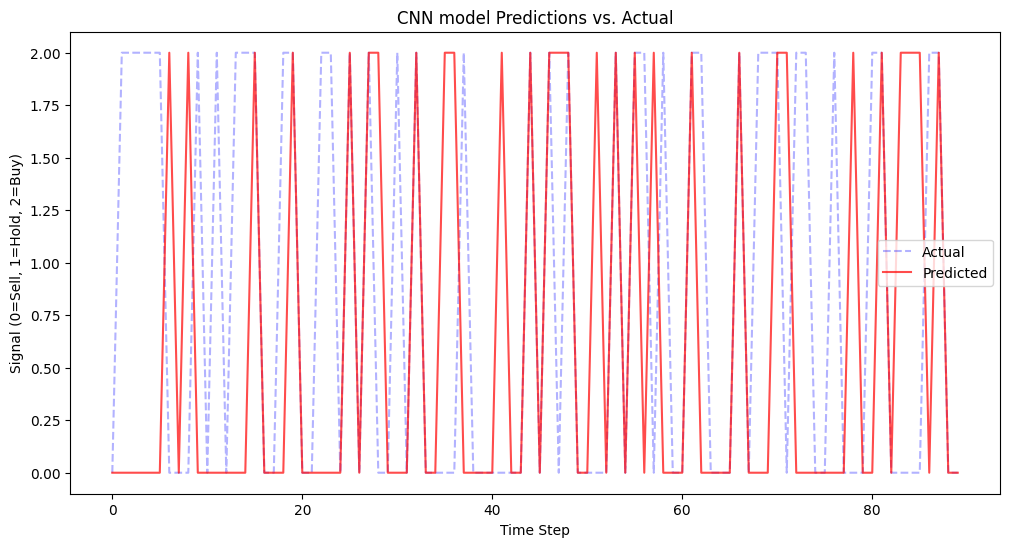

In [189]:
cnn_from_file = CNN()
cnn_from_file.load_state_dict(torch.load(model_path, weights_only=True))

all_predictions, all_targets = predict(cnn_from_file, loader_test)
plot(all_predictions, all_targets, "CNN model Predictions vs. Actual")

In [190]:
test_data_df = test_data.copy()
test_data_df = test_data_df.reset_index()
test_data_df

date      open      high       low     close    volume
0    2024-10-09 17:00:00  0.388026  0.382022  0.395491  0.388065 -0.717619
1    2024-10-09 18:00:00  0.388113  0.379366  0.378453  0.371492 -0.366095
2    2024-10-09 19:00:00  0.371557  0.365884  0.377079  0.374189 -0.697919
3    2024-10-09 20:00:00  0.374246  0.362881  0.329624  0.320137  0.283202
4    2024-10-09 21:00:00  0.320203  0.330181  0.328066  0.339503 -0.460862
...                  ...       ...       ...       ...       ...       ...
2204 2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222
2205 2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684
2206 2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703
2207 2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602
2208 2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148

[2209 rows x 6 columns]

In [191]:
predictions_df = pd.DataFrame(all_predictions, columns=['signal'])
predictions_df

signal
0          2
1          2
2          2
3          0
4          2
...      ...
2174       2
2175       0
2176       2
2177       0
2178       0

[2179 rows x 1 columns]

In [192]:
predictions_df.index = test_data_df.index[window_size:]
df = pd.concat([test_data_df, predictions_df], axis=1).dropna()
df

date      open      high       low     close    volume  \
30   2024-10-10 23:00:00  0.339151  0.335364  0.351291  0.346515 -0.817899   
31   2024-10-11 00:00:00  0.346572  0.339102  0.354826  0.346367 -0.748580   
32   2024-10-11 01:00:00  0.346415  0.360372  0.354704  0.364271 -0.553197   
33   2024-10-11 02:00:00  0.364337  0.356305  0.366001  0.358373 -0.642182   
34   2024-10-11 03:00:00  0.358421  0.361704  0.370674  0.367925 -0.698590   
...                  ...       ...       ...       ...       ...       ...   
2204 2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222   
2205 2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684   
2206 2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703   
2207 2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602   
2208 2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148   

      signal  
30       2.0  
31       2.0  
32       2.0  
33       0.0  
34       2.0  
...      ...  
2204     2.0  
2205     0.0  
2206     2.0  
2207     0.0  
2208     0.0  

[2179 rows x 7 columns]

In [193]:
df.columns = df.columns.str.capitalize()
df

Date      Open      High       Low     Close    Volume  \
30   2024-10-10 23:00:00  0.339151  0.335364  0.351291  0.346515 -0.817899   
31   2024-10-11 00:00:00  0.346572  0.339102  0.354826  0.346367 -0.748580   
32   2024-10-11 01:00:00  0.346415  0.360372  0.354704  0.364271 -0.553197   
33   2024-10-11 02:00:00  0.364337  0.356305  0.366001  0.358373 -0.642182   
34   2024-10-11 03:00:00  0.358421  0.361704  0.370674  0.367925 -0.698590   
...                  ...       ...       ...       ...       ...       ...   
2204 2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222   
2205 2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684   
2206 2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703   
2207 2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602   
2208 2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148   

      Signal  
30       2.0  
31       2.0  
32       2.0  
33       0.0  
34       2.0  
...      ...  
2204     2.0  
2205     0.0  
2206     2.0  
2207     0.0  
2208     0.0  

[2179 rows x 7 columns]

In [194]:
df.rename(columns={'Date': 'Datetime'}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index('Datetime', inplace=True)
df["Signal"] = df["Signal"].astype(int)
df

Open      High       Low     Close    Volume  Signal
Datetime                                                                     
2024-10-10 23:00:00  0.339151  0.335364  0.351291  0.346515 -0.817899       2
2024-10-11 00:00:00  0.346572  0.339102  0.354826  0.346367 -0.748580       2
2024-10-11 01:00:00  0.346415  0.360372  0.354704  0.364271 -0.553197       2
2024-10-11 02:00:00  0.364337  0.356305  0.366001  0.358373 -0.642182       0
2024-10-11 03:00:00  0.358421  0.361704  0.370674  0.367925 -0.698590       2
...                       ...       ...       ...       ...       ...     ...
2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222       2
2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684       0
2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703       2
2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602       0
2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148       0

[2179 rows x 6 columns]

In [195]:
# Создаем объект класса Backtest с текущей стратегией
bt = Backtest(df, CNNStrategy, cash=1_000_000, commission=.002, exclusive_orders=True)

# Запускаем бэктест
stats = bt.run()
bt.plot()

GridPlot(id='p11260', ...)

In [196]:
print(stats)

Start                     2024-10-10 23:00:00
End                       2025-01-09 17:00:00
Duration                     90 days 18:00:00
Exposure Time [%]                   99.908215
Equity Final [$]                713073.289728
Equity Peak [$]                1035736.374922
Return [%]                         -28.692671
Buy & Hold Return [%]               228.75738
Return (Ann.) [%]                  -73.858784
Volatility (Ann.) [%]                 4.67421
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -31.153013
Avg. Drawdown [%]                   -3.394124
Max. Drawdown Duration       83 days 03:00:00
Avg. Drawdown Duration        8 days 06:00:00
# Trades                                  978
Win Rate [%]                        41.206544
Best Trade [%]                      19.364936
Worst Trade [%]                    -15.903709
Avg. Trade [%]                    

In [ ]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv1d(5, 16, kernel_size=3)  # Input: 5 channels, Output: 16 channels
#         self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
#         self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
#         self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)
# 
#     def forward(self, x):
#         x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
#         x = torch.relu(self.conv1(x))
#         x = torch.relu(self.conv2(x))
#         x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
#         x = torch.relu(self.fc1(x))
#         return self.fc2(x)  # Return logits (raw output) for each class